In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf



In [411]:

# PCA analysis
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

# load excel data 
df = pd.read_excel('krx_result.xlsx')

date = df["Date"]

# drop Date column
df = df.drop('Date', axis=1)


# pac set for 1, 2 and 3 components
pca_1 = PCA(n_components=1)
pca_result_1 = pca_1.fit_transform(df)

pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(df)


pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(df)

# weight the corresponding elements with their eigenvalues
for i in range(1):
    pca_result_1[:,i] = pca_result_1[:,i] * (pca_1.explained_variance_ratio_[i]/ np.sum(pca_1.explained_variance_ratio_, axis=0)) 
    
for i in range(2):
    pca_result_2[:,i] = pca_result_2[:,i] * (pca_2.explained_variance_ratio_[i]/ np.sum(pca_2.explained_variance_ratio_, axis=0))
    
for i in range(3):
    pca_result_3[:,i] = pca_result_3[:,i] * (pca_3.explained_variance_ratio_[i]/ np.sum(pca_3.explained_variance_ratio_, axis=0)) 
    
# sum of weighted elements 
pca_result_1 = np.sum(pca_result_1, axis=1)
pca_result_2 = np.sum(pca_result_2, axis=1)
pca_result_3 = np.sum(pca_result_3, axis=1) 

# to dataframe, doing date index
pca_result_1 = pd.DataFrame(pca_result_1, index=date, columns=['PCA_1'])
pca_result_2 = pd.DataFrame(pca_result_2, index=date, columns=['PCA_2'])
pca_result_3 = pd.DataFrame(pca_result_3, index=date, columns=['PCA_3'])

# total pca results
pca_result = pd.concat([pca_result_1, pca_result_2, pca_result_3], axis=1) 

# load Yahoo finance data for KOSPI

kospi = yf.download('^KS11', start='1997-12-12', end='2024-11-29')
kospi = kospi['Close']

# merge with PCA results and KOSPI by date
pca_result = pca_result.merge(kospi, how='inner', left_index=True, right_index=True) 

# and kospi return
pca_result['KOSPI_return'] = pca_result['Close'].pct_change()


# load data
vol = pd.read_excel('vol.xlsx')
vol.columns = ['Date', 'Volume']
vol.index = vol['Date']
vol = vol.drop('Date', axis=1)

# merge with PCA results and vol by date
pca_result_to = pca_result.merge(vol, how='inner', left_index=True, right_index=True)





[*********************100%***********************]  1 of 1 completed


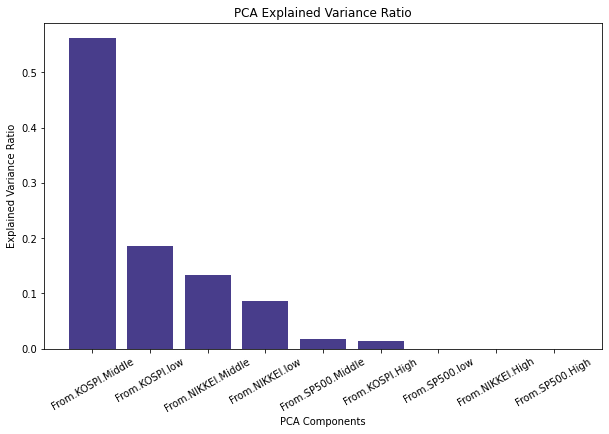

In [365]:
# each PCA ratio
pca_1_ratio = pca_1.explained_variance_ratio_
pca_2_ratio = pca_2.explained_variance_ratio_
pca_3_ratio = pca_3.explained_variance_ratio_

pca = PCA(n_components=9)
pca_to = pca.fit_transform(df)

loadings = pca.components_.T  
pc1_loadings = loadings[:, 0]  

# 4. PC1에 가장 큰 영향을 미친 변수 찾기
most_influential_index = np.argsort(np.abs(pc1_loadings))[-9:][::-1]
most_influential_variable = df.columns[most_influential_index]
most_influential_value = pc1_loadings[most_influential_index]


# plot the explained variance ratio for the first 9 components
plt.figure(figsize=(10, 6))
plt.bar(np.arange(9), pca.explained_variance_ratio_, color="darkslateblue")
plt.title('PCA Explained Variance Ratio')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')

# use the xticks to most_influential_variable
plt.xticks(np.arange(9), most_influential_variable)
plt.xticks(rotation=30)
plt.show()


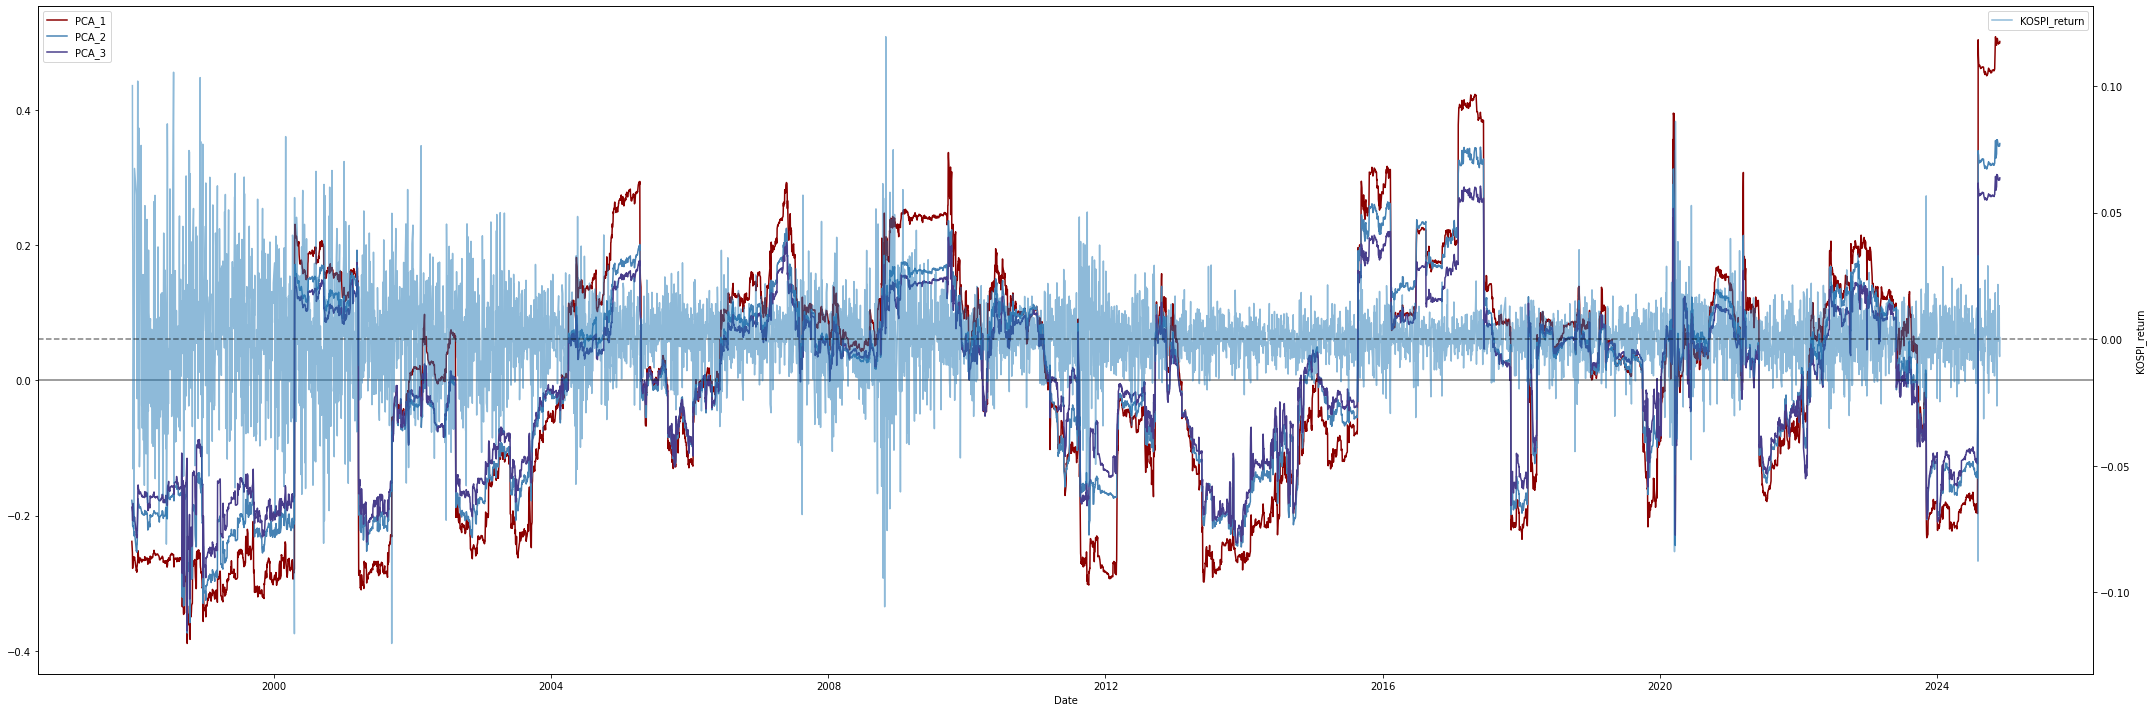

In [366]:
# Align the lengths of date and PCA results

p = pca_result.index
# daul axis plot
fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.set_xlabel('Date')
ax1.plot(p, pca_result['PCA_1'], color="darkred", label='PCA_1')
ax1.plot(p, pca_result['PCA_2'], color='steelblue', label='PCA_2')
ax1.plot(p, pca_result['PCA_3'], color='darkslateblue', label='PCA_3')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Date')
ax2.set_ylabel('KOSPI_return')  # we already handled the x-label with ax1
ax2.plot(p, pca_result['KOSPI_return'], color=color, label='KOSPI_return', alpha=0.5)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# 0 line for KOSPI return
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5) 

fig.tight_layout() 
plt.show() 



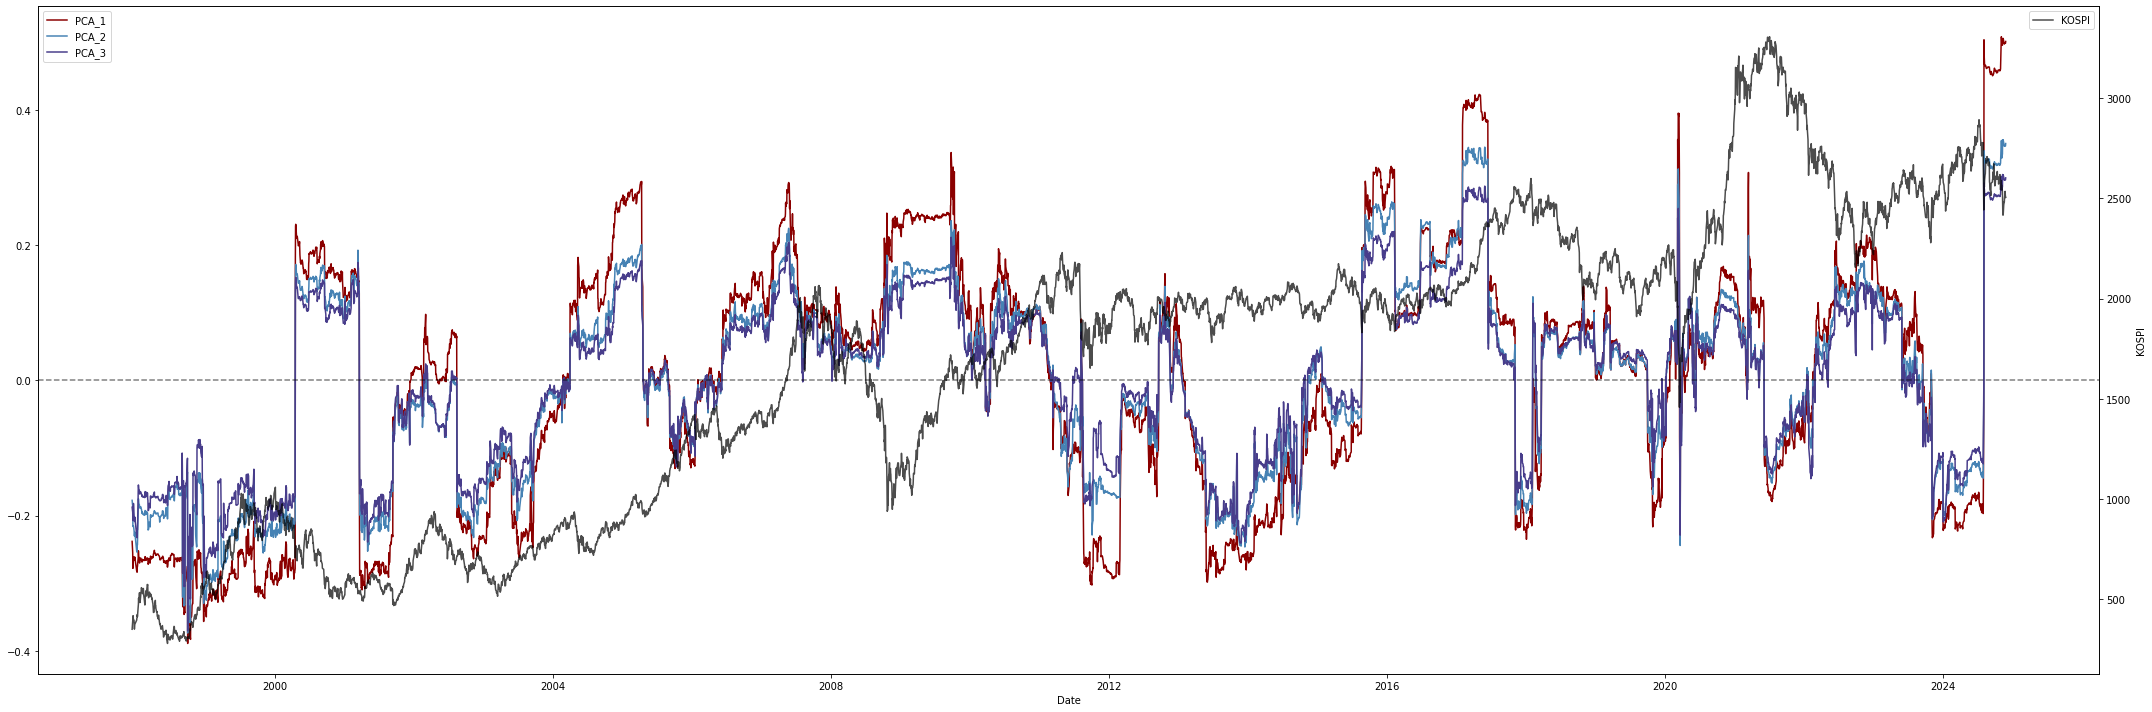

In [367]:
# Align the lengths of date and PCA results

p = pca_result.index
# daul axis plot
fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.set_xlabel('Date')
ax1.plot(p, pca_result['PCA_1'], color="darkred", label='PCA_1')
ax1.plot(p, pca_result['PCA_2'], color='steelblue', label='PCA_2')
ax1.plot(p, pca_result['PCA_3'], color='darkslateblue', label='PCA_3')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_xlabel('Date')
ax2.set_ylabel('KOSPI')  # we already handled the x-label with ax1
ax2.plot(p, pca_result['Close'], color=color, label='KOSPI', alpha=0.7)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# 0 line for KOSPI return
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)


fig.tight_layout() 
plt.show() 



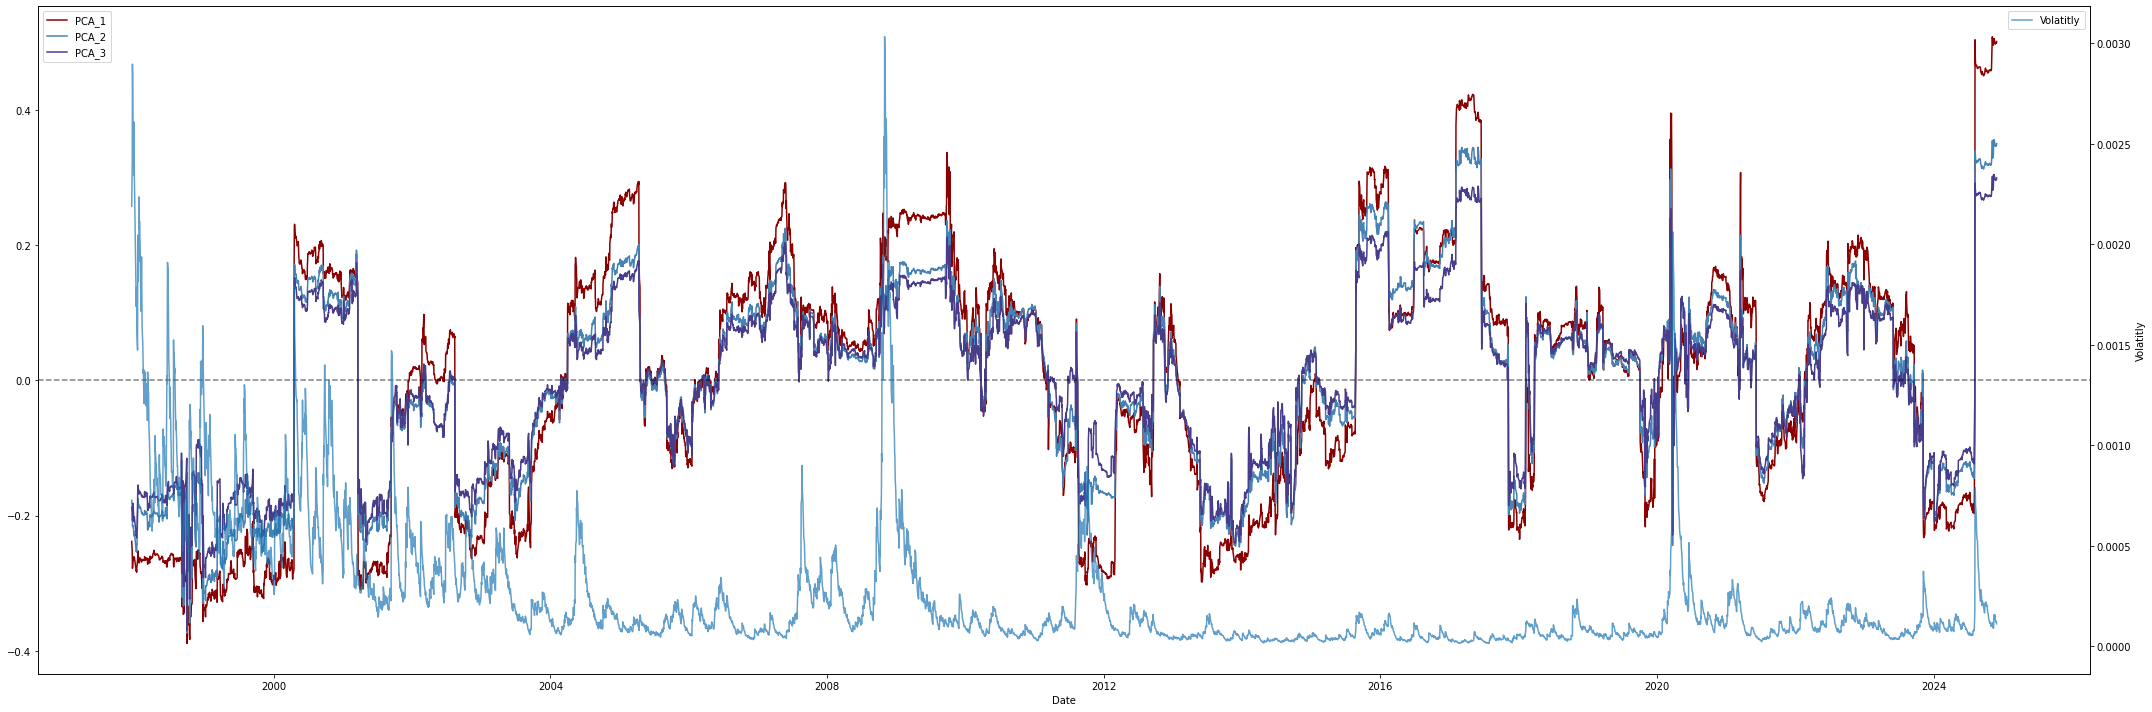

In [413]:
# Align the lengths of date and PCA results

p = pca_result.index
# daul axis plot
fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.set_xlabel('Date')
ax1.plot(p, pca_result['PCA_1'], color="darkred", label='PCA_1')
ax1.plot(p, pca_result['PCA_2'], color='steelblue', label='PCA_2')
ax1.plot(p, pca_result['PCA_3'], color='darkslateblue', label='PCA_3')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatitly')  # we already handled the x-label with ax1
ax2.plot(p, pca_result_to['Volume'], color=color, label='Volatitly', alpha=0.7)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# 0 line for KOSPI return
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)


fig.tight_layout() 
plt.show() 



In [439]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 예제 시계열 데이터 생성 (다차원 시계열 데이터)


# 2. Dynamic PCA를 위한 시간 지연(lagged) 데이터 생성 함수
def create_lagged_data(data, max_lag):
    lagged_data = []
    for lag in range(max_lag + 1):
        lagged = np.roll(data, lag, axis=0)  # 데이터를 lag만큼 이동
        lagged[:lag, :] = 0  # 앞부분은 0으로 채움
        lagged_data.append(lagged)
    return np.hstack(lagged_data)  # 시간 지연된 데이터 병합

# 시간 지연 개수 설정
lagged_data = create_lagged_data(df, 5)

# 3. PCA 적용
pca_dynamic = PCA(n_components=4)
pca_result_dy = pca_dynamic.fit_transform(lagged_data)

# 4. 결과 분석
explained_variance_ratio = pca_dynamic.explained_variance_ratio_

# 각 주성분의 기여도 출력
print("설명 분산 비율 (주성분별):")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# 5. 가장 큰 기여도를 가진 주성분 찾기
largest_component_index = np.argmax(explained_variance_ratio)
print(f"\n가장 큰 기여도를 가진 주성분: PC{largest_component_index+1}")




설명 분산 비율 (주성분별):
PC1: 0.5503
PC2: 0.1724
PC3: 0.1235
PC4: 0.0811

가장 큰 기여도를 가진 주성분: PC1


In [419]:
# to dataframe, doing date index
    
for i in range(4):
    pca_result_dy[:,i] = pca_result_dy[:,i] * (pca_dynamic.explained_variance_ratio_[i]/ np.sum(pca_3.explained_variance_ratio_, axis=0)) 
    

pca_result_dy = np.sum(pca_result_dy, axis=1) 

pca_result_dy = pd.DataFrame(pca_result_dy, index=date, columns=['PCA_3'])

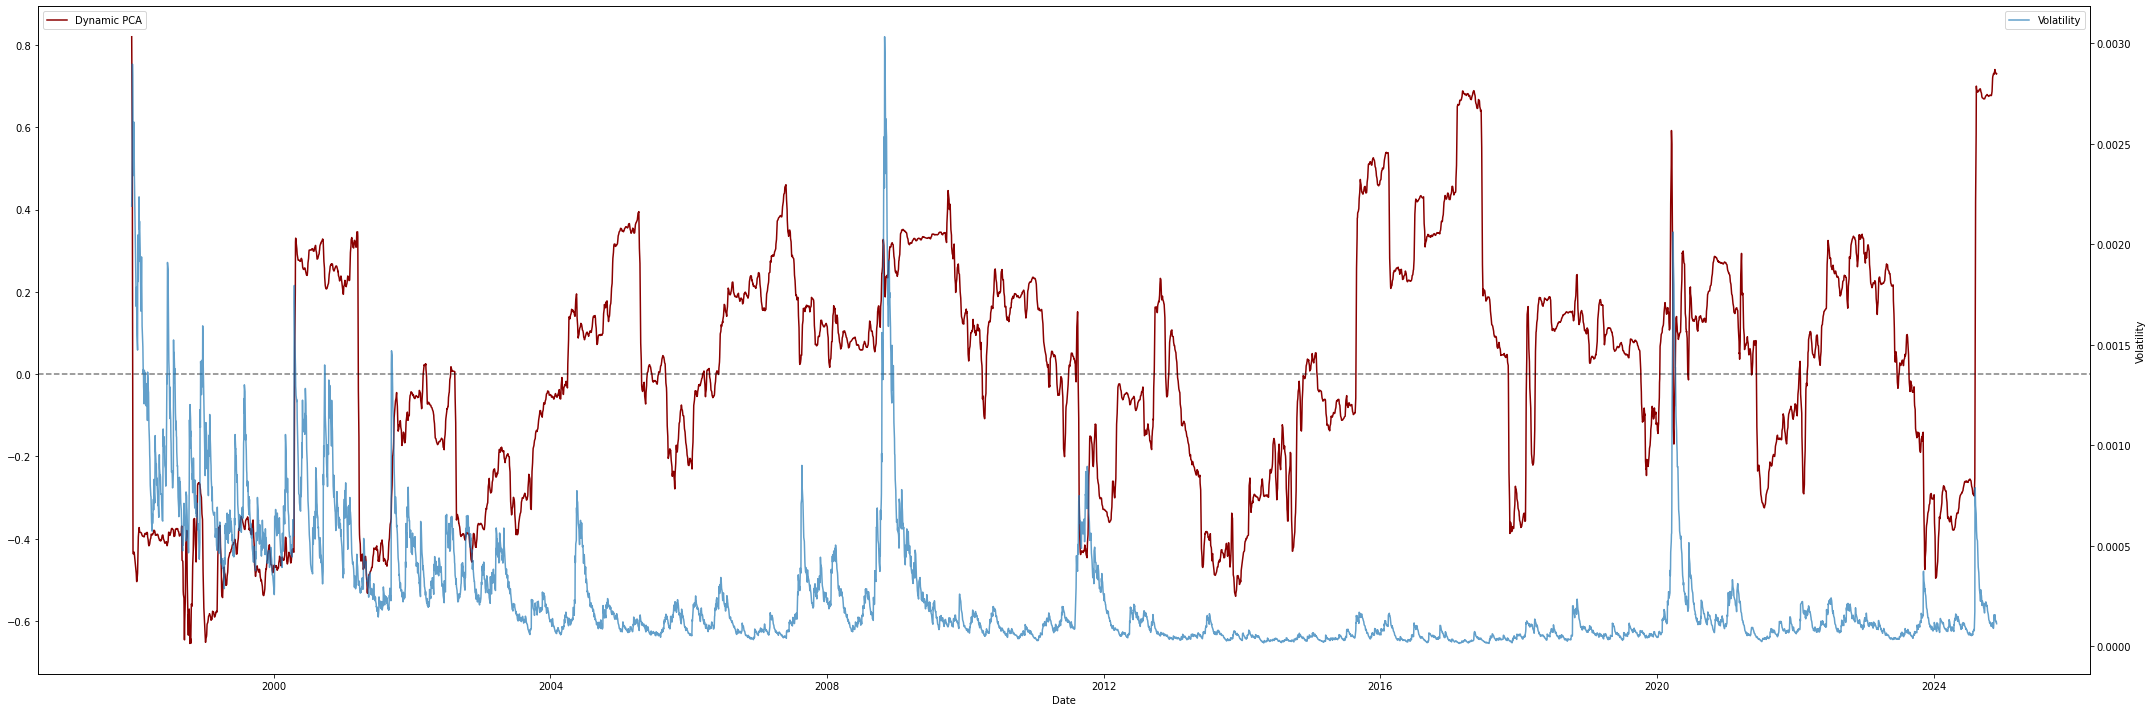

In [420]:
# plot
# plt.figure(figsize=(30, 10))
# plt.plot(pca_result_dy, label='Dynamic PCA', color='darkslateblue')
# plt.plot(pca_result_to['Volume'], label='PCA', color='darkorange')
# plt.legend()
# plt.show()

# Align the lengths of p and pca_result_dy
pca_result_dy_aligned = pca_result_dy.reindex(p)

fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.set_xlabel('Date')
ax1.plot(p, pca_result_dy_aligned, color="darkred", label='Dynamic PCA')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')  # we already handled the x-label with ax1
ax2.plot(p, pca_result_to['Volume'], color=color, label='Volatility', alpha=0.7)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# 0 line for KOSPI return
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)

fig.tight_layout() 

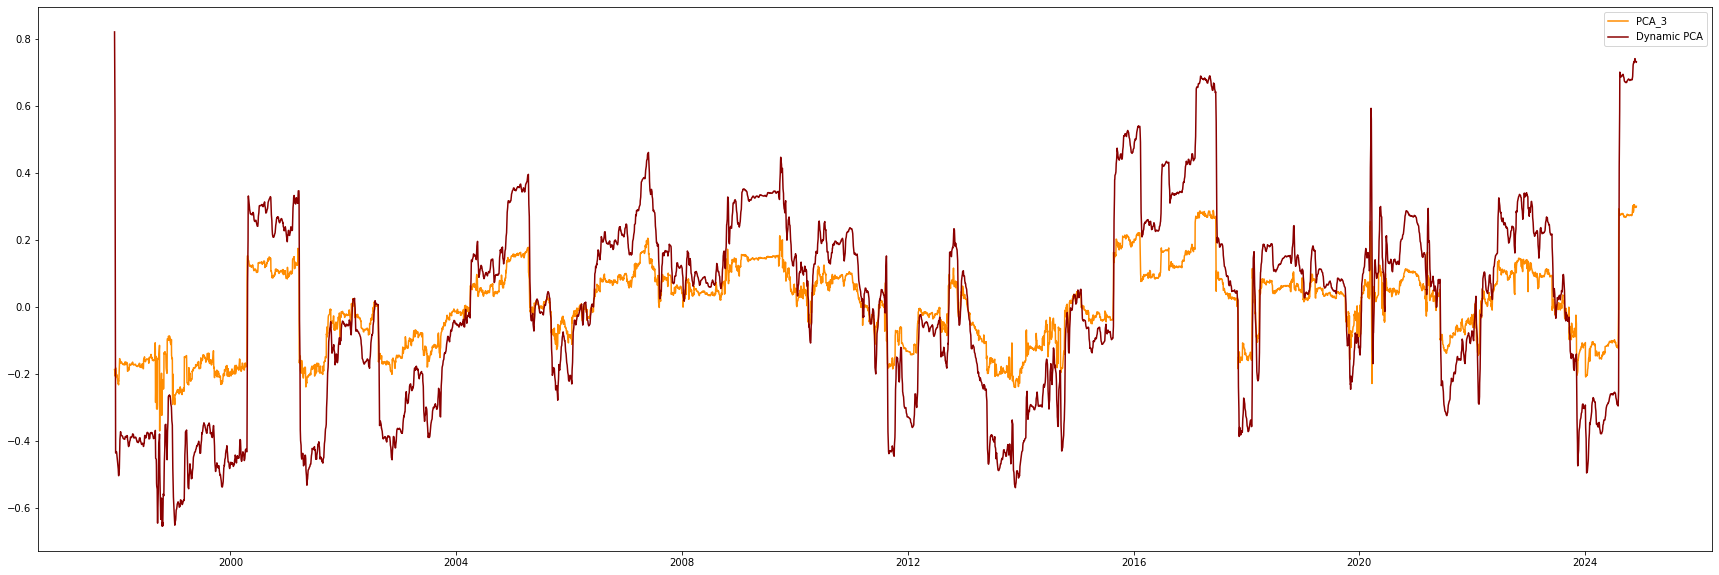

In [431]:
# plot pca_result_to

plt.figure(figsize=(30, 10)) 
plt.plot(pca_result_to['PCA_3'], label='PCA_3', color='darkorange')
plt.plot(pca_result_to['20'], label='Dynamic PCA', color='darkred')
plt.legend()
plt.show()

